In [2]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 558.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 34.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 24.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

2024-01-17 08:53:42.206040: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-17 08:53:42.269936: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-17 08:53:42.269993: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-17 08:53:42.273511: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-17 08:53:42.290814: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-17 08:53:42.292945: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
# Setup

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 20
warnings.filterwarnings('ignore')

## Introduction

The transmission line is the most crucial part of the power system. The requirement of power and its allegiance has grown up exponentially over the modern era, and the prominent role of a transmission line is to transmit electric power from the source area to the distribution network. The electrical power system consists of so many complex dynamic and interacting elements that are always prone to disturbance or an electrical fault.

## Data and Overview

### Binary and Multiclass Classification

Our dataset contains the possibility for both types of classification. Firstly we predict whether the electrical relays have a fault or not. Futhermore, we predict where the fault is. Based on where the fault is found, there are different permutations. <br>
Output: [G C B A] <br>
[0 0 0 0] - No Fault <br>
[1 0 0 1] - LG fault (Between Phase A and Ground) <br>
[0 0 1 1] - LL fault (Between Phase A and Phase B) <br>
[1 0 1 1] - LLG Fault (Between Phases A,B and Ground) <br>
[0 1 1 1] - LLL Fault (Between all three phases) <br>
[1 1 1 1] - LLLG fault (Three phase symmetrical fault) <br>
Here, we conclude that there are 6 types of faults, hence 6 output classes.


In [7]:
binary_data = pd.read_csv('Dataset/classData.csv')
multi_data = pd.read_csv('Dataset/classData1.csv')

In [8]:
#Info about binary and multidata
binary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


## Exploratory Data Analysis - Binary Classification

Columns 7 and 8 contain no information, so we drop them

In [9]:
binary_data.drop(binary_data.iloc[:,[7,8]], axis=1, inplace=True)

In [10]:
print(f'Number of Samples: {binary_data.shape[0]}\nNumber of Features: {binary_data.shape[1]}')

Number of Samples: 7861
Number of Features: 8


<h4>Composition of Target variable<h4>

## Feature engineering

In [11]:
binary_data.isna().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Vc    0
dtype: int64

Since there are no missing values, all values are standardised and there are no categorical varibales, no further feature engineering is required

## Binary Classification Neural Network Model

In [12]:
binary_data.head()

,G,C,B,A,Ia,Ib,Ic,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,-0.113983


In [13]:
y = binary_data.iloc[:,0]
X = binary_data.iloc[:,1:7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6288, 6), (1573, 6), (6288,), (1573,))

In [14]:
X_test

,C,B,A,Ia,Ib,Ic
834,0,0,1,-877.131763,-54.269164,0.246562
2698,1,1,0,56.037710,-288.512410,235.148317
5994,0,0,0,43.877065,-20.668865,-26.638721
7362,0,0,0,-37.617238,94.971179,-60.362054
6744,0,0,0,4.334075,-26.685624,19.159367
...,...,...,...,...,...,...
3152,1,1,0,41.915404,-732.270274,692.800473
1414,0,1,1,633.537970,195.156434,48.356566
2939,1,1,0,-62.011921,673.188423,-608.743113
7341,0,0,0,-17.869694,90.846768,-75.991264


In [15]:
tf.random.set_seed(2)

model1 = keras.models.Sequential()

model1.add(keras.layers.Dense(6,  
                              input_shape=(6,),
                              name='Input_layer',
                              activation='relu'))
model1.add(keras.layers.Dense(16,
                             name='Hidden_layer1',
                             activation='relu'))
model1.add(keras.layers.Dense(1,
                             name='Output_layer',
                             activation='sigmoid'))

model1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

In [16]:
history = model1.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
158/158 [==============================] - ETA: 0s - loss: 15.0135 - accuracy: 0.5575

158/158 [==============================] - 1s 4ms/step - loss: 15.0135 - accuracy: 0.5575 - val_loss: 2.3471 - val_accuracy: 0.6900
Epoch 2/5
158/158 [==============================] - 0s 2ms/step - loss: 1.4329 - accuracy: 0.7358 - val_loss: 0.8212 - val_accuracy: 0.8196
Epoch 3/5
158/158 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.8209 - val_loss: 0.4927 - val_accuracy: 0.8744
Epoch 4/5
158/158 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.8473 - val_loss: 0.4880 - val_accuracy: 0.8275
Epoch 5/5
158/158 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.8515 - val_loss: 0.4165 - val_accuracy: 0.8728


In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 6)                 42        
                                                                 
 Hidden_layer1 (Dense)       (None, 16)                112       
                                                                 
 Output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
history = pd.DataFrame(history.history)

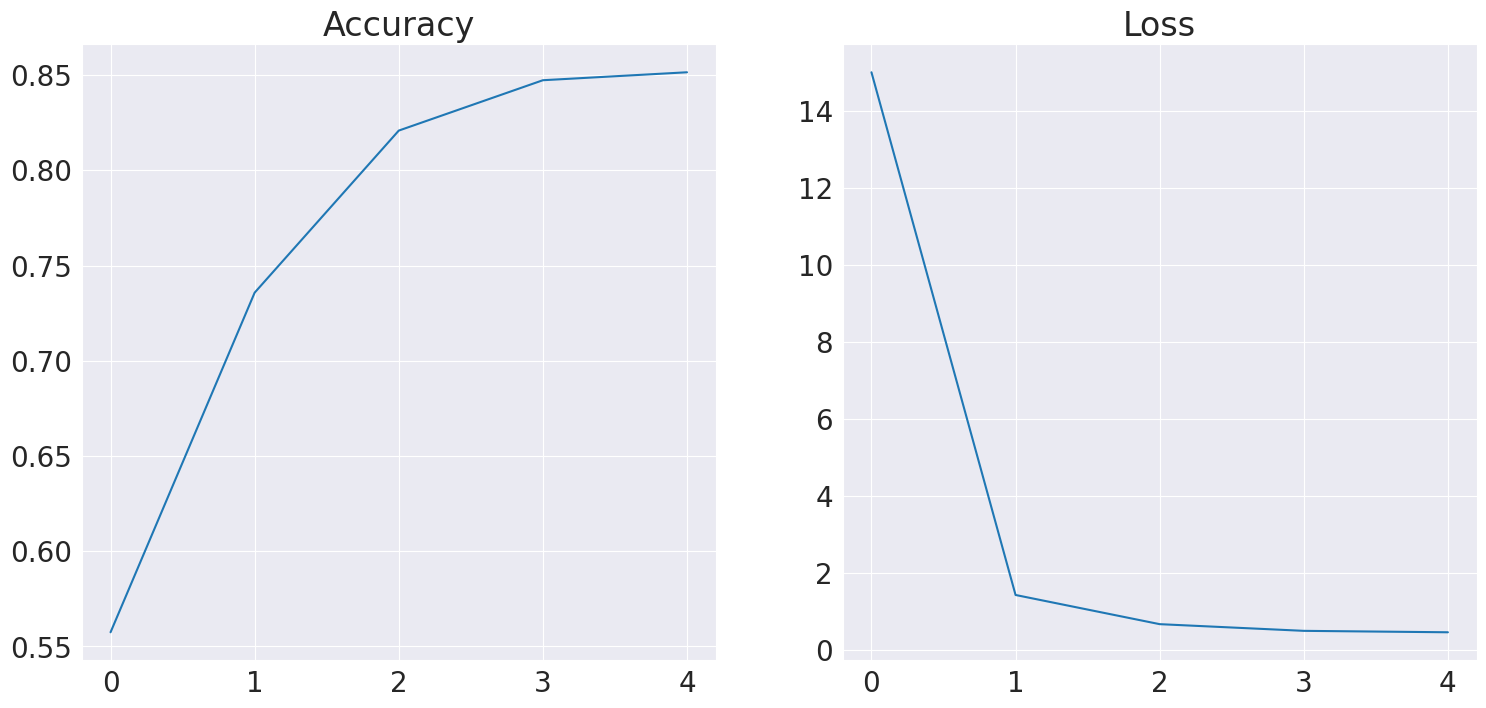

In [19]:
plt.figure(figsize=(18,8))

a1 = plt.subplot2grid((1,2),(0,0))
a1.plot(history['accuracy'], label='Accuracy')
a1.set_title('Accuracy')

a2 = plt.subplot2grid((1,2),(0,1))
a2.plot(history['loss'], label='Loss')
a2.set_title('Loss')

plt.show()

In [20]:
y_pred = model1.predict(X_test)
y_pred.shape, y_test.shape

50/50 [==============================] - 0s 791us/step


((1573, 1), (1573,))

In [21]:
y_pred = np.where(y_pred>0.5, 1, 0)

In [22]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)*100:.03f}%')
print(f'Precision Score: {precision_score(y_test, y_pred)*100:.03f}%')
print(f'Recall Score: {recall_score(y_test, y_pred)*100:.03f}%')

Accuracy Score: 84.806%
Precision Score: 80.365%
Recall Score: 85.268%


In [23]:
confusion_matrix(y_test, y_pred)

array([[761, 140],
       [ 99, 573]])

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       901
           1       0.80      0.85      0.83       672

    accuracy                           0.85      1573
   macro avg       0.84      0.85      0.85      1573
weighted avg       0.85      0.85      0.85      1573



## Exploratory Data Analysis - Multiclass Classification

In [25]:
print(f'Number of Samples: {multi_data.shape[0]}\nNumber of Features: {multi_data.shape[1]}')

Number of Samples: 7861
Number of Features: 10


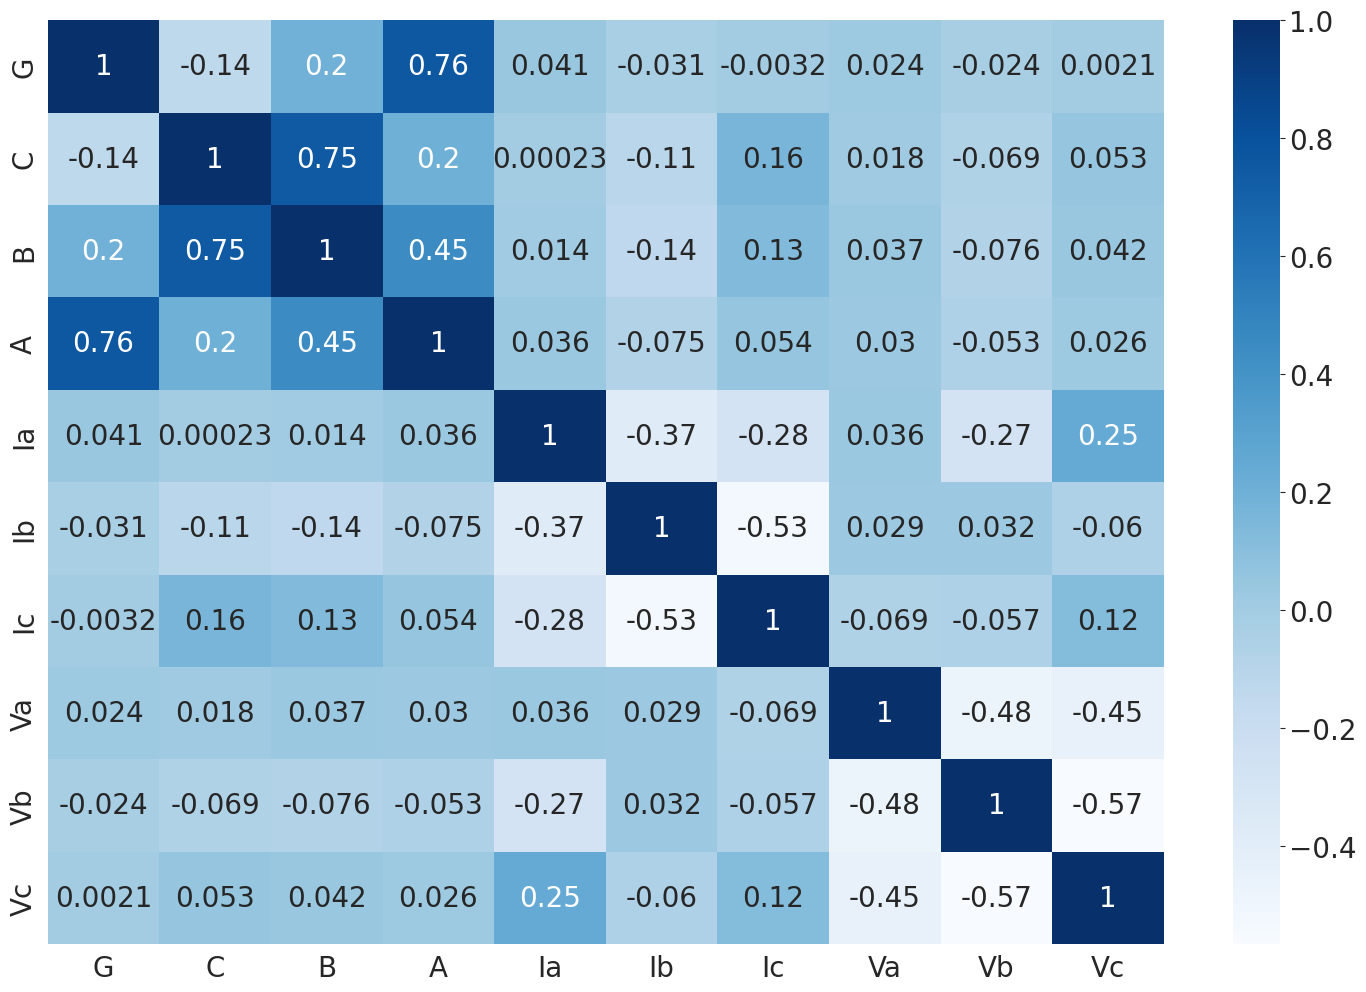

In [26]:
plt.figure(figsize=(18,12))
sns.heatmap(multi_data.corr(), annot=True, cmap='Blues')
plt.show()

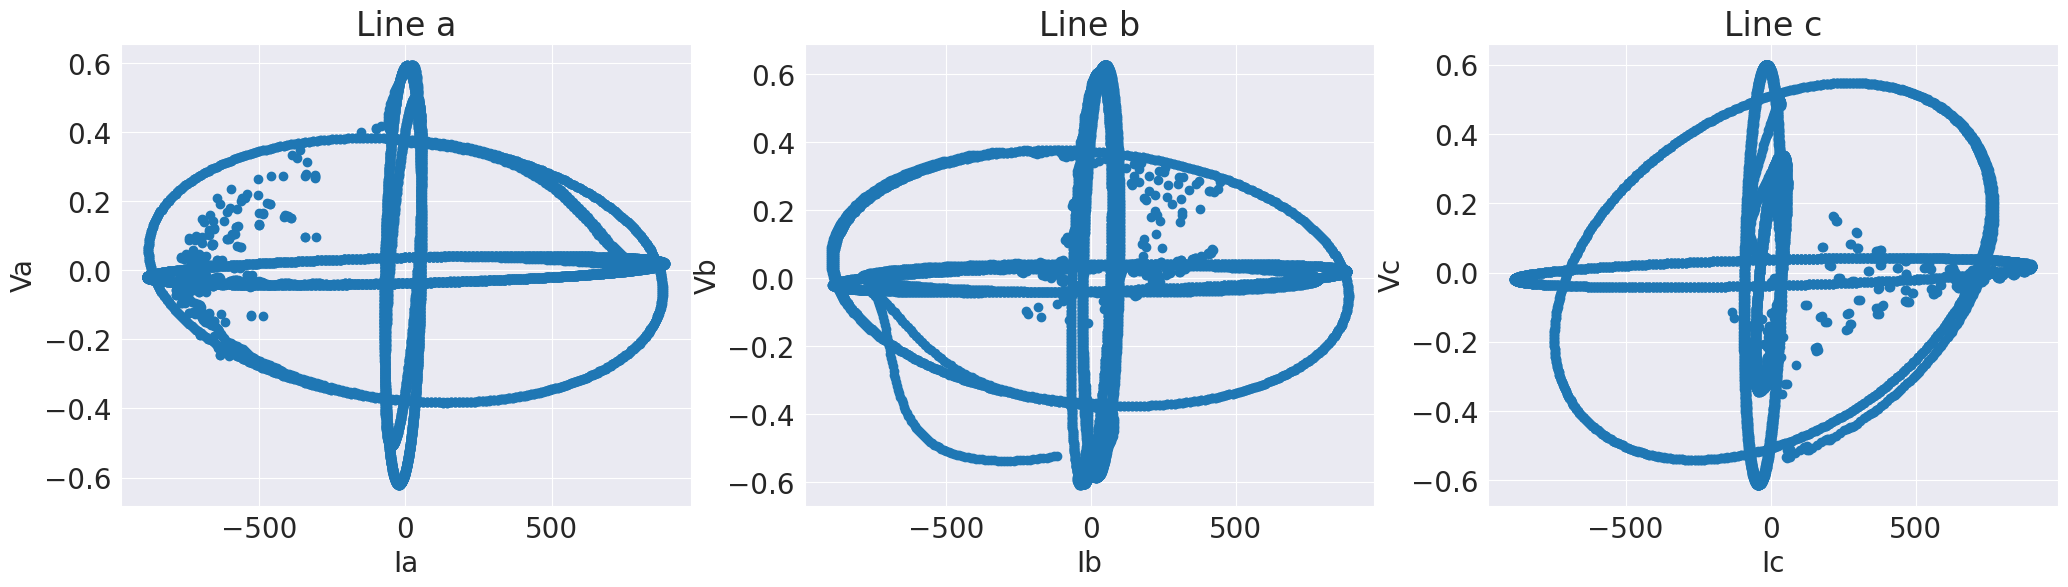

In [27]:
plt.figure(figsize=(25,6))

a1 = plt.subplot2grid((1,3),(0,0))
a1.scatter(multi_data['Ia'], multi_data['Va'])
a1.set_title('Line a')
a1.set_xlabel('Ia')
a1.set_ylabel('Va')

a2 = plt.subplot2grid((1,3),(0,1))
a2.scatter(multi_data['Ib'], multi_data['Vb'])
a2.set_title('Line b')
a2.set_xlabel('Ib')
a2.set_ylabel('Vb')

a3 = plt.subplot2grid((1,3),(0,2))
a3.scatter(multi_data['Ic'], multi_data['Vc'])
a3.set_title('Line c')
a3.set_xlabel('Ic')
a3.set_ylabel('Vc')

plt.show()

## Feature engineering

In [28]:
multi_data.isna().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

Since there are no missing values, all values are standardised and there are no categorical varibales, no further feature engineering is required

## Multiclass Classification Neural Network Model

Output: [G C B A] <br>
[0 0 0 0] - No Fault <br>
[1 0 0 1] - LG fault (Between Phase A and Ground) <br>
[0 0 1 1] - LL fault (Between Phase A and Phase B) <br>
[1 0 1 1] - LLG Fault (Between Phases A,B and Ground) <br>
[0 1 1 1] - LLL Fault (Between all three phases) <br>
[1 1 1 1] - LLLG fault (Three phase symmetrical fault) <br>

Since output is of four different types, we put them together in one column and there permutations become different output classes

In [29]:
multi_data['faultType'] = multi_data['G'].astype(str) + multi_data['C'].astype(str) + multi_data['B'].astype(str) + multi_data['A'].astype(str)
multi_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,faultType
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


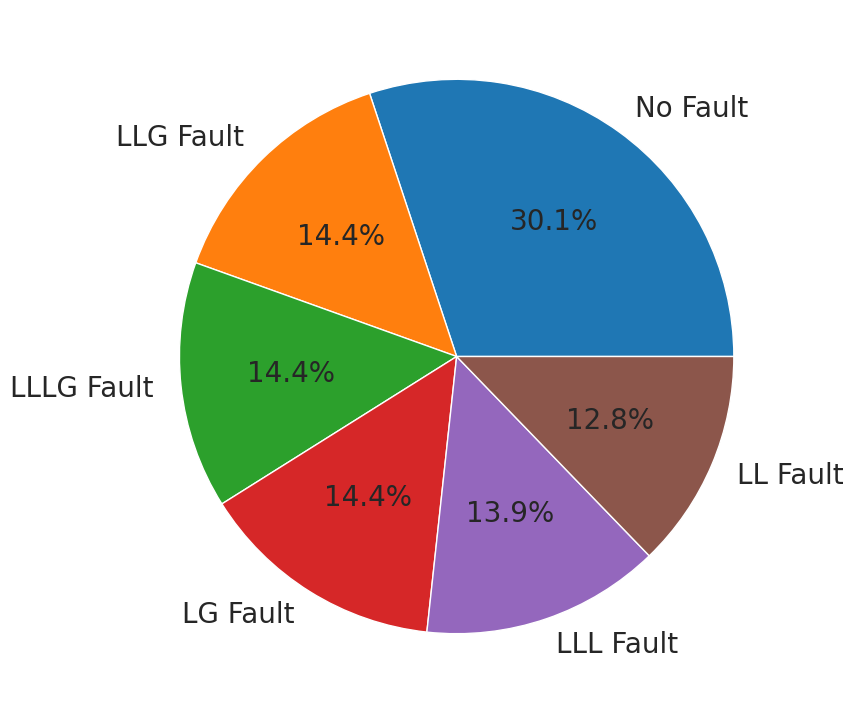

In [30]:
plt.pie(multi_data['faultType'].value_counts(), autopct='%1.1f%%',
       labels=['No Fault', 'LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault'])
plt.show()

In [31]:
X = multi_data.drop(['G','C','B','A','faultType'], axis=1)
y = multi_data['faultType']

In [32]:
enc = LabelEncoder()
y = enc.fit_transform(y)

In [33]:
y = keras.utils.to_categorical(y, 6)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6288, 6), (1573, 6), (6288, 6), (1573, 6))

In [35]:
tf.random.set_seed(2)

model2 = keras.models.Sequential()

model2.add(keras.layers.Dense(128,
                              input_shape=(6,),
                              name='Input_layer',
                              activation='relu'))
model2.add(keras.layers.Dense(240,
                              name='Hidden_layer1',
                              activation='relu'))
model2.add(keras.layers.Dense(240,
                              name='Hidden_layer2',
                              activation='tanh'))
model2.add(keras.layers.Dense(240,
                              name='Hidden_layer3',
                              activation='relu'))

model2.add(keras.layers.Dense(6,
                             name='output_layer',
                             activation='softmax'))

model2.compile(
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

In [36]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 128)               896       
                                                                 
 Hidden_layer1 (Dense)       (None, 240)               30960     
                                                                 
 Hidden_layer2 (Dense)       (None, 240)               57840     
                                                                 
 Hidden_layer3 (Dense)       (None, 240)               57840     
                                                                 
 output_layer (Dense)        (None, 6)                 1446      
                                                                 
Total params: 148982 (581.96 KB)
Trainable params: 148982 (581.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
history = model2.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
79/79 [==============================] - 1s 5ms/step - loss: 1.1927 - accuracy: 0.5342 - val_loss: 1.1118 - val_accuracy: 0.6272
Epoch 2/50
79/79 [==============================] - 0s 4ms/step - loss: 1.0479 - accuracy: 0.5825 - val_loss: 1.0438 - val_accuracy: 0.5612
Epoch 3/50
66/79 [========================>.....] - ETA: 0s - loss: 0.9969 - accuracy: 0.6058

79/79 [==============================] - 0s 3ms/step - loss: 0.9971 - accuracy: 0.6030 - val_loss: 0.9104 - val_accuracy: 0.6431
Epoch 4/50
79/79 [==============================] - 0s 4ms/step - loss: 0.9531 - accuracy: 0.6189 - val_loss: 0.8999 - val_accuracy: 0.6749
Epoch 5/50
79/79 [==============================] - 0s 3ms/step - loss: 0.9042 - accuracy: 0.6525 - val_loss: 1.0256 - val_accuracy: 0.5429
Epoch 6/50
79/79 [==============================] - 0s 3ms/step - loss: 0.8432 - accuracy: 0.6668 - val_loss: 0.8354 - val_accuracy: 0.6542
Epoch 7/50
79/79 [==============================] - 0s 3ms/step - loss: 0.8006 - accuracy: 0.6789 - val_loss: 0.7078 - val_accuracy: 0.7242
Epoch 8/50
79/79 [==============================] - 0s 5ms/step - loss: 0.7472 - accuracy: 0.7000 - val_loss: 0.6355 - val_accuracy: 0.7560
Epoch 9/50
79/79 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.7207 - val_loss: 0.6343 - val_accuracy: 0.7305
Epoch 10/50
79/79 [============

In [38]:
history = pd.DataFrame(history.history)

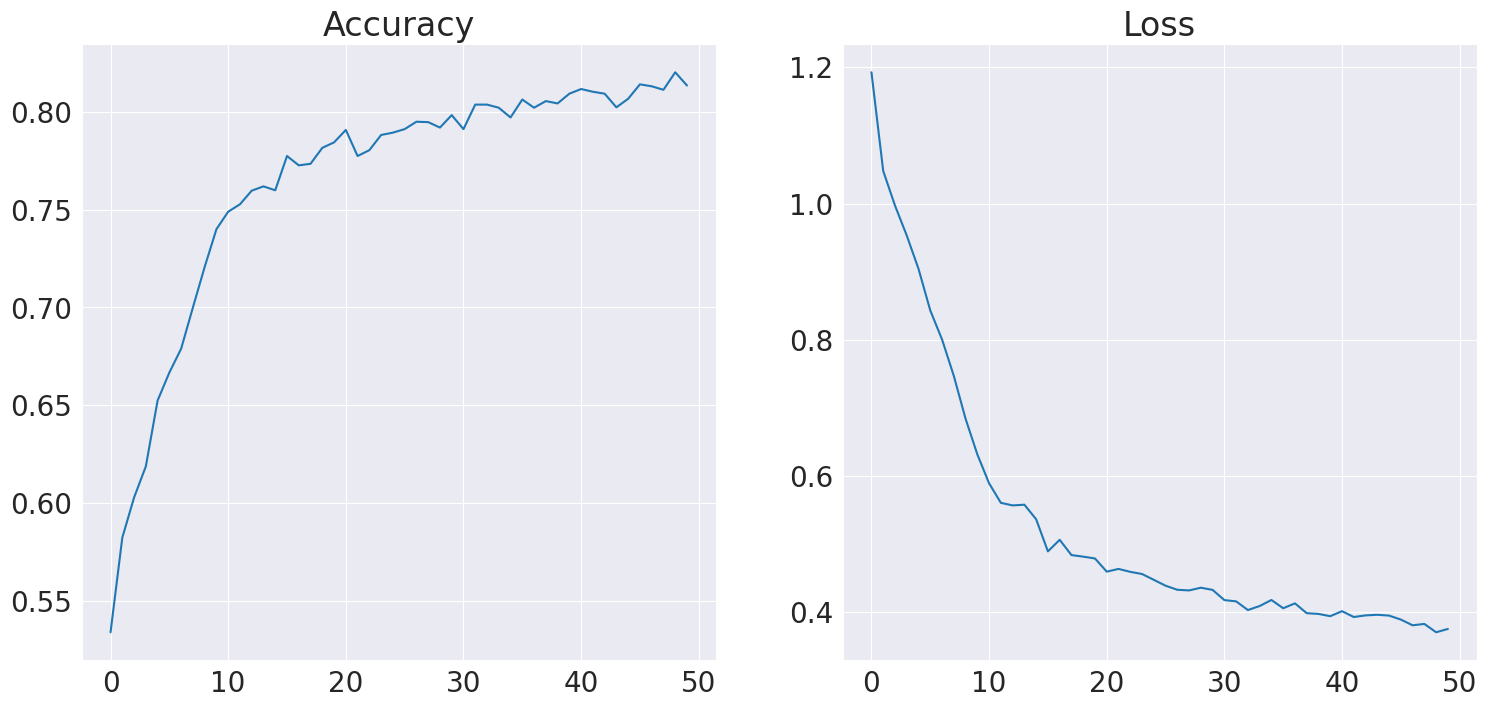

In [39]:
plt.figure(figsize=(18,8))

a1 = plt.subplot2grid((1,2),(0,0))
a1.plot(history['accuracy'], label='Accuracy')
a1.set_title('Accuracy')

a2 = plt.subplot2grid((1,2),(0,1))
a2.plot(history['loss'], label='Loss')
a2.set_title('Loss')

plt.show()

In [40]:
y_pred_prob = model2.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test = np.argmax(y_test, axis=1)

50/50 [==============================] - 0s 1ms/step


In [41]:
y_test.shape, y_pred.shape

((1573,), (1573,))

In [42]:
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)*100:.03f}%')

Accuracy Score : 79.720%


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       468
           1       0.84      0.96      0.89       202
           2       0.51      0.57      0.54       231
           3       0.90      1.00      0.95       220
           4       0.70      0.87      0.78       226
           5       0.53      0.19      0.28       226

    accuracy                           0.80      1573
   macro avg       0.74      0.77      0.74      1573
weighted avg       0.78      0.80      0.77      1573

